In [1]:
from google.colab import drive      
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g6qoQfIDdgEErYXMcR8R4GGiHtpsf7WQhYJPG0Lw1XyAEFxLo2lmbk
Mounted at /content/drive


# Basics


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import collections

In [3]:
os.chdir("/content/drive/My Drive/BTP/NSL-KDD")
os.listdir()

['KDDTest+.txt',
 'KDDTest+.arff',
 'KDDTest1.jpg',
 'index.html',
 'KDDTrain+.arff',
 'KDDTest-21.txt',
 'KDDTrain+.txt',
 'KDDTrain+_20Percent.arff',
 'KDDTest-21.arff',
 'KDDTrain1.jpg',
 'KDDTrain+_20Percent.txt',
 'Y_pred.csv',
 'Xtrain_set',
 'Ytrain_set',
 'Xtest_set',
 'Ytest_set',
 'XX',
 'YY',
 'Y5',
 'dataset.csv',
 'tsne.csv',
 'Y_train',
 'Y_test',
 'X_test',
 'Attack_labels',
 'Y_test_attack',
 'Y_train_attack',
 'X_train',
 'tree.dot',
 'tree.png',
 'model.png',
 'checkpoint',
 'final_model',
 'final_model_5',
 'completed_model',
 'only_type1',
 'both_1_and_2',
 'experience_replay_buffer',
 'experience_replay_buffer.pkl',
 'finetune_accuracy.pkl',
 'er_accuracy.pkl',
 'der_accuracy.pkl',
 'finetune_accuracy1.pkl',
 'er_accuracy_final.pkl',
 'lwf.pkl']

In [4]:
# extract the pre-preocessed datasets
X_train = pd.read_csv("X_train", index_col=0)
Y_train = pd.read_csv("Y_train", index_col=0)

X_test = pd.read_csv("X_test", index_col=0)
Y_test = pd.read_csv("Y_test", index_col=0)

In [5]:
# store the feature_names
cc = X_train.columns

In [6]:
Y_test = np.array(Y_test)
Y_train = np.array(Y_train)

Y_train = np.reshape(Y_train, -1)
Y_test = np.reshape(Y_test, -1)

In [7]:
Y_train_attack = pd.read_csv("Y_train_attack", index_col=0)
Y_test_attack = pd.read_csv("Y_test_attack", index_col=0)

Y_train_attack = np.array(Y_train_attack).reshape(-1)
Y_test_attack = np.array(Y_test_attack).reshape(-1)

test_attacks = set(np.squeeze(Y_test_attack))
train_attacks = set(np.squeeze(Y_train_attack))

diff = test_attacks - train_attacks
diff

{0, 5, 10, 11, 13, 21, 22, 24, 26, 28, 29, 31, 33, 36, 37, 38, 39}

# Preparing the dataset

In [18]:
def convert(y, type):
  if(type=='multi'):
    print('Already in this format')
    Y = y
  elif(type=='binary'):
    Y = []
    for i in y:
      if i==0:
        Y.append('0')
      else:
        Y.append('1')
    Y = np.array(Y).astype('int32')
  return Y

In [19]:
Y_train = convert(Y_train, 'binary')
Y_test = convert(Y_test, 'binary')

X_train = np.array(X_train)
X_test = np.array(X_test)

In [20]:
from collections import Counter
Counter(Y_train)

Counter({0: 67343, 1: 58630})

In [21]:
Y_test_attack

array([14, 14, 16, ...,  1, 16, 11])

In [22]:
X_train_attack = []
X_train_no = []
X_test_attack = []
X_test_no = []
X_diff = []

for i in range(0,len(Y_train)):
  if Y_train[i]==1:
    X_train_attack.append(X_train[i:i+1,:])
  else:
    X_train_no.append(X_train[i:i+1,:])

for i in range(0,len(Y_test)):
  if Y_test[i]==1:
    X_test_attack.append(X_test[i:i+1,:])
  else:
    X_test_no.append(X_test[i:i+1,:])

  if (int(Y_test_attack[i]) in diff):
    X_diff.append(X_test[i])

In [23]:
X_train_attack = np.squeeze(np.array(X_train_attack))
X_test_attack = np.squeeze(np.array(X_test_attack))

X_train_no = np.squeeze(np.array(X_train_no))
X_test_no = np.squeeze(np.array(X_test_no))

In [24]:
X_train_attack.shape

(58630, 122)

In [25]:
all_merged = [X_train_attack, X_train_no]
all_merged = np.concatenate(all_merged)

def find_pca(num_com):
  from sklearn.decomposition import PCA
  pca = PCA(n_components= num_com)
  pca.fit(all_merged)
  print(pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_))
  return pca


In [26]:
pca = find_pca(10)

X_train_red = pca.transform(X_train)
X_test_red = pca.transform(X_test)

[5.12041085e-01 2.03480994e-01 1.26271271e-01 7.09969626e-02
 5.31921948e-02 1.97530744e-02 1.35098126e-02 3.35821419e-04
 1.55460881e-04 9.45673120e-05] 0.999831244310712


In [27]:
pca = find_pca(2)

X_train_attack_red = pca.transform(X_train_attack)
X_test_attack_red = pca.transform(X_test_attack)

X_train_no_red = pca.transform(X_train_no)
X_test_no_red = pca.transform(X_test_no)

X_diff = pca.transform(X_diff)

[0.51204109 0.20348099] 0.7155220788428249


# PCA 2D - Only visualization

<Figure size 432x288 with 0 Axes>

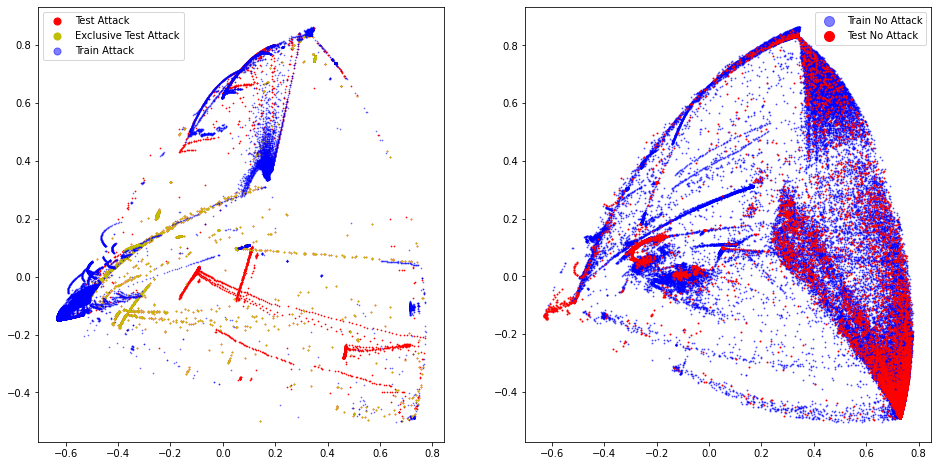

In [ ]:
from matplotlib.pyplot import figure

f = plt.figure()    
f, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16,8))

ax1, ax2 = ax.ravel()
# ax1.xlim(-1,1.5)
# ax1.ylim(-1,1)
ax1.scatter(X_test_attack_red[:,0],X_test_attack_red[:,1], c='r', s=0.5, label='Test Attack')
#ax1.scatter(X_test_attack_red[:,0],X_test_attack_red[:,1], c='b', s=1, label='Test Attack')
#ax1.scatter(X_train_no_red[:,0],X_train_no_red[:,1], c='b', s=0.1, label='Train No Attack')
ax1.scatter(X_diff[:,0],X_diff[:,1], c='y', s=0.5,  label='Exclusive Test Attack')
ax1.scatter(X_train_attack_red[:,0],X_train_attack_red[:,1], c='b', alpha=0.5, s=0.5, label='Train Attack')
ax1.legend(fontsize=10, markerscale=10)

# ax2.xlim(-1,1.5)
# ax2.ylim(-1,1)
#ax2.scatter(X_diff[:,0],X_diff[:,1], c='r', s=0.1,  label='Test Attack')
ax2.scatter(X_train_no_red[:,0],X_train_no_red[:,1], c='b', alpha=0.5, s=1, label='Train No Attack')
ax2.scatter(X_test_no_red[:,0],X_test_no_red[:,1], c='r', s=1,  label='Test No Attack')
ax2.legend(fontsize=10, markerscale=10)
plt.show()

# Local Outlier Factor


Test data point not satisfying 19.90% 
Train data point satisfying 98.14% 
 


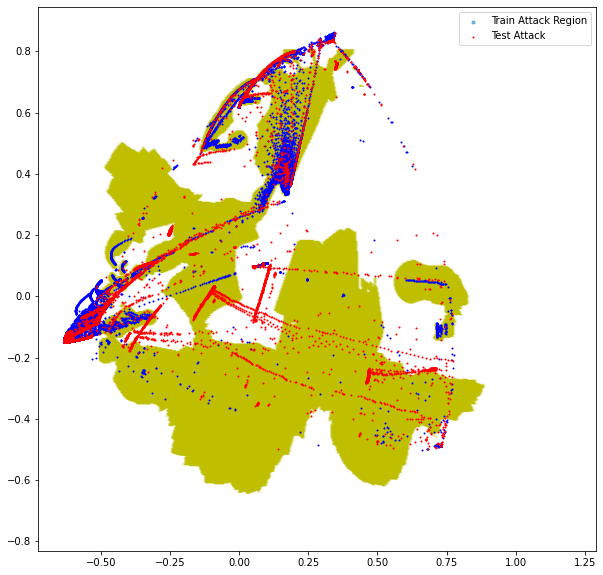

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors= 15, novelty = True, contamination=0.02)

clf.fit(X_train_attack_red)
c_train = clf.predict(X_train_attack_red)
c_test = clf.predict(X_test_attack_red)
xx, yy = np.meshgrid(np.linspace(-0.5, 1.2, 500), np.linspace(-0.75, 0.8, 500))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z = (Z+1)/2

print('Test data point not satisfying {:.2f}% '.format(100 * collections.Counter(c_test)[-1]/len(c_test)))
print('Train data point satisfying {:.2f}% '.format(100 * collections.Counter(c_train)[1]/len(c_train)))
print(' ')

figure(figsize=(10,10))
colors=['w','y']
plt.scatter(xx, yy, c = Z, alpha = 0.5, s = 10, cmap=matplotlib.colors.ListedColormap(colors), label='Train Attack Region')
plt.scatter(X_train_attack_red[:, 0], X_train_attack_red[:, 1], c='b',s=1)
plt.scatter(X_test_attack_red[:, 0], X_test_attack_red[:, 1], c='r',s= 1, label='Test Attack')
plt.legend()
plt.show()


Test data point not satisfying 8.28% 
Train data point satisfying 97.62% 
 


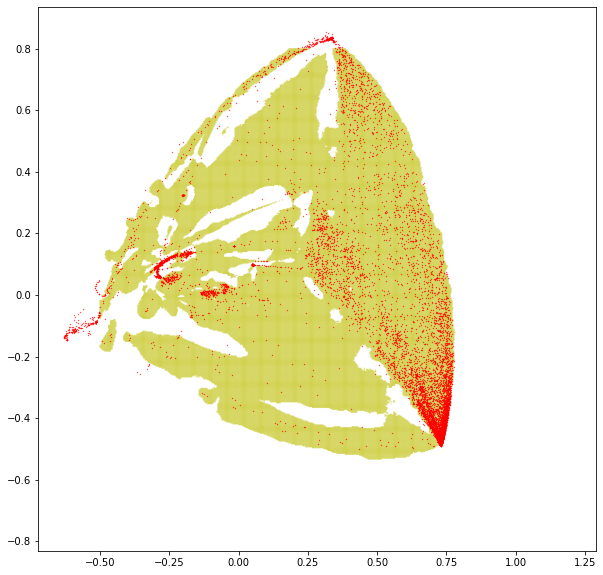

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, novelty = True)

clf.fit(X_train_no_red)
c_train = clf.predict(X_train_no_red)
c_test = clf.predict(X_test_no_red)
xx, yy = np.meshgrid(np.linspace(-0.5, 1.2, 500), np.linspace(-0.75, 0.8, 500))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z = (Z+1)/2

print('Test data point not satisfying {:.2f}% '.format(100 * collections.Counter(c_test)[-1]/len(c_test)))
print('Train data point satisfying {:.2f}% '.format(100 * collections.Counter(c_train)[1]/len(c_train)))
print(' ')

figure(figsize=(10,10))
colors=['w','y']
plt.scatter(xx, yy, c = Z, alpha = 1, s = 0.05, cmap=matplotlib.colors.ListedColormap(colors))
#plt.scatter(X_train_attack_red[:, 0], X_train_attack_red[:, 1], c='r',s=1)
plt.scatter(X_test_no_red[:, 0], X_test_no_red[:, 1], c='r',s=0.1)
plt.show()


# Quantifying the change using one class SVM

In [ ]:
from sklearn.svm import OneClassSVM

clf = OneClassSVM(kernel='rbf', nu=0.02)
clf.fit(X_train_attack_red)
c_train = clf.predict(X_train_attack_red)
c_test = clf.predict(X_test_attack_red)

print('Test data point not satisfying {:.2f}% '.format(100 * collections.Counter(c_test)[-1]/len(c_test)))
print('Train data point satisfying {:.2f}% '.format(100 * collections.Counter(c_train)[1]/len(c_train)))

Test data point not satisfying 17.19% 
Train data point satisfying 98.00% 


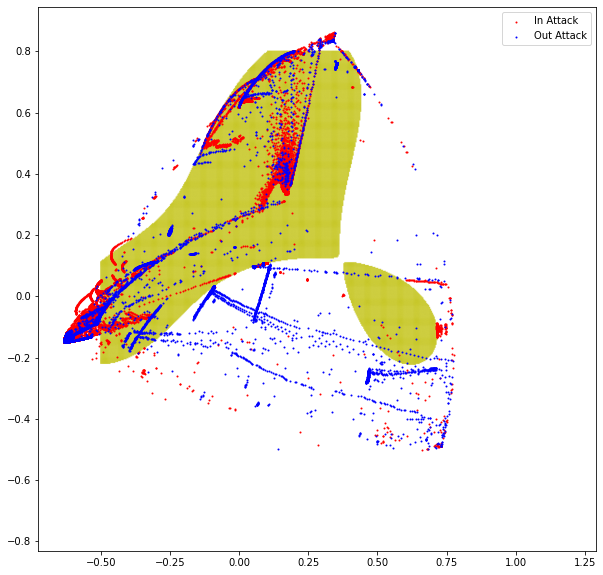

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 10))

xx, yy = np.meshgrid(np.linspace(-0.5, 1.2, 500), np.linspace(-0.75, 0.8, 500))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z = (Z+1)/2
colors=['w','y']
plt.scatter(xx, yy, c = Z, alpha = 1, s = 0.1, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(X_train_attack_red[:,0],X_train_attack_red[:,1], c='r', s=1, label='In Attack')
plt.scatter(X_test_attack_red[:,0], X_test_attack_red[:,1], c='b', s=1, label='Out Attack')
plt.legend()
plt.show()

Summary:
Visulization was done with local outlier detection and using One class SVM after using PCA for converting the data to 2D. 

Local Outlier Detection: 
Train Yes = 98.14
Test No = 19.90%

One Class SVM:
Train Yes =  98.00% 
Test No = 17.19%

So it is pretty clear from the calculations and the images that there is a huge difference between the train and the test set. 

# Data Overlap Measurement for attack datapoints Kolmogorov–Smirnov test

In [ ]:
top = [1, 2, 19, 20, 25, 28, 29, 30, 31, 39]

In [ ]:
from scipy import stats
diff = []
for i in range(0, X_train.shape[1]):
  rvs1 = np.squeeze(X_train[:,i:i+1])
  rvs2 = np.squeeze(X_test[:,i:i+1])
  res = stats.ks_2samp(rvs1, rvs2)
  print(res)
  diff.append([i,res[0], res[1]])
  

Ks_2sampResult(statistic=0.07964532468195884, pvalue=8.77236323222964e-106)
Ks_2sampResult(statistic=0.0651726594679562, pvalue=5.678124169770662e-71)
Ks_2sampResult(statistic=0.12408202697822579, pvalue=3.8127312726325103e-256)
Ks_2sampResult(statistic=0.00011204867894543113, pvalue=1.0)
Ks_2sampResult(statistic=0.0049643176520353105, pvalue=0.7336143453710062)
Ks_2sampResult(statistic=0.00040388596006168953, pvalue=1.0)
Ks_2sampResult(statistic=0.023973293586061706, pvalue=5.694520816300035e-10)
Ks_2sampResult(statistic=0.020363407136648193, pvalue=2.592711413181752e-07)
Ks_2sampResult(statistic=0.0528210721441954, pvalue=9.130581833568494e-47)
Ks_2sampResult(statistic=0.0062467750321771875, pvalue=0.4445737986730479)
Ks_2sampResult(statistic=0.0013969779463766097, pvalue=0.999999999999943)
Ks_2sampResult(statistic=0.00045762591651599127, pvalue=1.0)
Ks_2sampResult(statistic=0.003609576231079936, pvalue=0.9644926287879814)
Ks_2sampResult(statistic=0.0004152425567642837, pvalue=1.0)
K

In [ ]:
significant

[[0, 0.07964532468195884, 8.77236323222964e-106],
 [1, 0.0651726594679562, 5.678124169770662e-71],
 [2, 0.12408202697822579, 3.8127312726325103e-256],
 [6, 0.023973293586061706, 5.694520816300035e-10],
 [7, 0.020363407136648193, 2.592711413181752e-07],
 [8, 0.0528210721441954, 9.130581833568494e-47],
 [18, 0.02671406411245758, 2.8059394690206847e-12],
 [19, 0.09784279516011735, 1.98795680465926e-159],
 [20, 0.09187284509528293, 1.28758748683687e-140],
 [21, 0.18582024659863094, 0.0],
 [22, 0.18428355455442857, 0.0],
 [23, 0.12741783429748765, 4.435389760346036e-270],
 [24, 0.12219348924381424, 2.0237055474605516e-248],
 [25, 0.07067744295155964, 2.155182787609217e-83],
 [26, 0.09791279605033487, 1.1770938774690163e-159],
 [27, 0.012234973047865028, 0.006527324230659417],
 [28, 0.04974767714004891, 1.5713105614712467e-41],
 [29, 0.07381252140295225, 6.453021133219115e-91],
 [30, 0.06625354359479863, 2.4818280031308715e-73],
 [31, 0.08612300532569317, 1.2833338840868385e-123],
 [32, 0.06

In [ ]:
a1 = len(X_train)
a2 = len(X_test)

1.36 * np.sqrt((a1+a2)/(a1*a2))

0.009834963862195232

In [ ]:
significant = []
features = []
for i in range(0,len(diff)):
  if(diff[i][2] < 0.05):
    significant.append(diff[i])

In [ ]:
len(significant)

47

In [ ]:
high = []
for k in significant:
  if(k[1] < 0.009834963862195232):
    #print(k)
    print(k,  len(np.unique(X_train[:,k[0]])))
    high.append(k[0])

print(high)
  #print(len(np.unique(X_train[:,k[0]])))

[]


In [ ]:
for i in top:
  print(diff[i])

[1, 0.23361852828072727, 0.0]
[2, 0.3004904314107151, 0.0]
[19, 0.2996501044346443, 0.0]
[20, 0.2659396475105974, 0.0]
[25, 0.16904609455844555, 9.326661389853266e-262]
[28, 0.17657792219469148, 1.4580773853069436e-285]
[29, 0.1627860645549416, 9.254080078814673e-243]
[30, 0.16001332883589559, 1.4171053452018815e-234]
[31, 0.2603716162276125, 0.0]
[39, 0.16048937425856308, 5.703251781254136e-236]


Among the features that have a higher p-value than 0.05 there is almost perfect overlap. Thus the feature values don't shift a lot. Also the top 10 important features used to differentiate between the train and the test set fall into this category but have no big deviation. 


In the histogram overlap analysis all the top-10 features have very high overlap 94.79% which is actually the least amongst all the features. 

Therefore there is significant shift but the values of a particular feature doesn't change a lot and also the distribution remains the same. Even the top differentiating feature just contributed only around 6% therefore multiple features combine to create this issue which is visible when the PCA top 2 features are extracted and plotted.


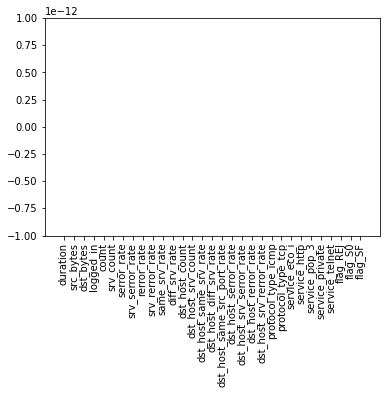

In [ ]:
val = []

for i in features:
  val.append(cc[int(i)])

plt.bar(val, significant)
plt.xticks(rotation='vertical')
plt.show()

# Histogram overlap computations 
----> Confirms the KS test. Very high overlap for all the top features. Even the least is 94.79%


In [ ]:

overlap = []
small = 100
#for i in top:
for i in range(0,X_train.shape[1]):
  hist_1, _ = np.histogram(X_train[:,i], bins=1000, range=[0, 1])
  hist_2, _ = np.histogram(X_test[:,i], bins=1000, range=[0, 1])

  minima = np.minimum(hist_1, hist_2)
  intersection = np.true_divide(np.sum(minima), np.sum(hist_2))
  if(intersection < small):
    small = intersection
  #print(np.sum(minima), np.sum(hist_2), intersection)
  overlap.append([i,intersection])

small

0.9479240596167494

In [ ]:
cc[28]

'dst_host_count'

In [ ]:
overlap = np.array(overlap).astype('float32')
overlap = overlap[overlap[:,1].argsort()]

for i in range(10):
  k = str(cc[int(overlap[i,0])]) + "  &  " + str(overlap[i,1]) + "   &   " +  str(100*feat_importances2[cc[int(overlap[i,0])]]) + "  \\\ \hline"
  print(k)

dst_bytes  &  0.9479241   &   17.451884049321816  \\ \hline
duration  &  0.9539124   &   1.342751509444975  \\ \hline
service_pop_3  &  0.9637154   &   0.5787124202262983  \\ \hline
hot  &  0.978797   &   0.4301628722301069  \\ \hline
dst_host_srv_count  &  0.97941804   &   6.395046412104661  \\ \hline
dst_host_count  &  0.9796398   &   13.078277936477011  \\ \hline
num_failed_logins  &  0.9810149   &   0.3195433146351751  \\ \hline
is_guest_login  &  0.9818134   &   0.387887525920148  \\ \hline
service_ftp  &  0.9845192   &   0.2562562279982636  \\ \hline
srv_count  &  0.98518455   &   2.6671366430241124  \\ \hline


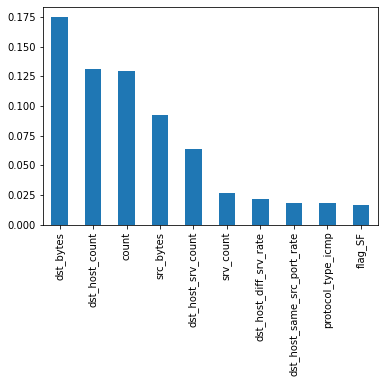

In [ ]:
Xc = np.concatenate([X_train, X_test])
Yc = np.concatenate([Y_train, Y_test])
from sklearn.utils import shuffle
Xc, Yc = shuffle(Xc, Yc)

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(Xc, Yc)
# display the relative importance of each attribute
#print(model.feature_importances_)

feat_importances2 = pd.Series(model.feature_importances_, index=cc)
feat_importances2.nlargest(10).plot(kind='bar')
plt.show()

In [ ]:
feat_importances2['duration']

0.01342751509444975

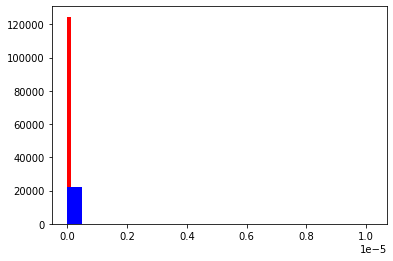

In [ ]:
plt.hist(X_train[:,27]/len(X_train), bins=20, color='r')
plt.hist(X_test[:,27]/len(X_test), bins=20, color='b')
plt.show()

# Feature importance while differentinating between the train and the test dataset


Creating Y array for train and test

In [28]:
Y_classify = [np.ones(X_train.shape[0]), np.zeros(X_test.shape[0])]
Y_classify = np.concatenate(Y_classify)
Y_classify.shape

(148517,)

Mergining attack of train and test X's

In [29]:
X_classify = [X_train, X_test]
X_classify = np.concatenate(X_classify)
X_classify.shape

(148517, 122)

Discriminative distance using random forest classifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10, max_depth= 5, criterion = 'entropy', verbose=0, random_state=0)

score = cross_val_score(clf, X_classify, Y_classify, cv=10, scoring='roc_auc')
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.77 (+/- 0.01)


85% accuracy between the train and the test set but 95% accuracy for the train_attack and test_attack dataset. Which also confirms the fact that the attack patterns differ in the test dataset because of which the model fails.


In [36]:
Counter(Y_classify), Counter(Y_train)

(Counter({0.0: 22544, 1.0: 125973}), Counter({0: 67343, 1: 58630}))

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=50, random_state=0)

clf.fit(X_classify, Y_classify)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                     oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [37]:
imp = clf.feature_importances_
imp = imp/sum(imp)
print(imp)
limit = np.sort(imp)[-10]
print(limit)
map = []
for i in range(len(imp)):
  if(imp[i]>=limit):
    map.append(i)

[1.61175727e-02 4.42393534e-02 4.22807026e-02 6.11125797e-05
 7.68707120e-04 1.26420412e-04 3.81094007e-03 7.86565191e-03
 3.04251131e-02 7.79419263e-04 4.62603259e-04 7.13736200e-05
 6.27002280e-04 3.07489867e-04 2.38549556e-04 4.66391405e-04
 0.00000000e+00 2.22814615e-04 6.28369324e-03 5.34731623e-02
 5.05595495e-02 1.27699428e-02 9.81873527e-03 1.77635850e-02
 1.47339240e-02 4.10257273e-02 2.61969997e-02 2.34990623e-02
 5.77090790e-02 6.10345408e-02 4.38778409e-02 4.92600773e-02
 3.07050781e-02 2.00562317e-02 2.13937680e-02 1.59343011e-02
 2.77645410e-02 1.83523026e-02 4.00323497e-03 3.91055758e-02
 1.00298999e-02 1.25502186e-04 2.07475873e-04 5.94146875e-04
 2.37530589e-06 8.05860501e-04 4.73474728e-04 3.86491419e-04
 4.07029370e-04 4.49217665e-04 2.84916480e-04 2.95537745e-04
 6.59061466e-04 8.05677020e-03 2.89592610e-04 1.94343331e-03
 2.65123298e-03 2.58023382e-04 2.25700451e-04 9.14442855e-04
 3.91209969e-03 7.01008516e-03 4.57229603e-04 1.34195919e-06
 3.10895966e-04 2.502384

In [44]:
for i in map:
  print(i, cc[i],end = ' ')
  print(" & ", end = ' ')
  print("{:.2f}".format(imp[i]*100))

1 src_bytes  &  4.42
2 dst_bytes  &  4.23
19 count  &  5.35
20 srv_count  &  5.06
25 same_srv_rate  &  4.10
28 dst_host_count  &  5.77
29 dst_host_srv_count  &  6.10
30 dst_host_same_srv_rate  &  4.39
31 dst_host_diff_srv_rate  &  4.93
39 protocol_type_tcp  &  3.91


In [51]:
kk = [29, 28, 19, 20, 31, 1, 30, 2, 25, 39]

In [46]:
clf.fit(X_train, Y_train)
map_train = clf.feature_importances_

clf.fit(X_test, Y_test)
map_test = clf.feature_importances_

In [52]:
trsum = 0
tesum = 0

for i in kk:
  print(" & {:.2f}".format(100*map_train[i]), end = ' & ')
  print("{:.2f}".format(100*map_test[i]))
  trsum += map_train[int(i)]
  tesum += map_test[int(i)]

trsum, tesum

 & 6.77 & 5.07
 & 18.22 & 10.10
 & 13.58 & 5.64
 & 2.89 & 3.90
 & 0.61 & 0.67
 & 8.42 & 7.73
 & 0.58 & 1.22
 & 22.26 & 23.37
 & 0.63 & 1.22
 & 0.81 & 2.28


(0.7478295907271693, 0.6120384578477069)

# Comparing RF and Logistic Regression performance

In [ ]:
def compute(clf, type):

  print('----{}----'.format(type))

  clf.fit(X_train_red, Y_train)

  y_train_pred = clf.predict(X_train_red)
  y_test_pred = clf.predict(X_test_red)

  from sklearn.metrics import classification_report
  print(classification_report(Y_train, y_train_pred))
  print(classification_report(Y_test, y_test_pred))

  # Rows: True Label
  # Columns: Predicted Label

  from sklearn.metrics import confusion_matrix
  print(confusion_matrix(Y_train, y_train_pred))
  print(confusion_matrix(Y_test, y_test_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 50, max_depth=10, criterion = 'entropy', verbose=0, random_state=0)
compute(clf, 'Random Forests')

----Random Forests----
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     67343
           1       1.00      0.99      1.00     58630

    accuracy                           1.00    125973
   macro avg       1.00      1.00      1.00    125973
weighted avg       1.00      1.00      1.00    125973

              precision    recall  f1-score   support

           0       0.66      0.98      0.78      9711
           1       0.97      0.61      0.75     12833

    accuracy                           0.77     22544
   macro avg       0.81      0.79      0.77     22544
weighted avg       0.84      0.77      0.76     22544

[[67275    68]
 [  457 58173]]
[[9481  230]
 [4993 7840]]


In [ ]:
# To cross verify there is no overfitting and there is a definite drop in performance from the train to the test set

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
compute(clf, 'Logistic Regression')

----Logistic Regression----
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     67343
           1       0.91      0.93      0.92     58630

    accuracy                           0.92    125973
   macro avg       0.92      0.92      0.92    125973
weighted avg       0.92      0.92      0.92    125973

              precision    recall  f1-score   support

           0       0.62      0.90      0.74      9711
           1       0.89      0.58      0.70     12833

    accuracy                           0.72     22544
   macro avg       0.76      0.74      0.72     22544
weighted avg       0.77      0.72      0.72     22544

[[61916  5427]
 [ 4228 54402]]
[[8786  925]
 [5352 7481]]
